# Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, OrderedDict
import math, copy

df = pd.read_csv('Carseats.csv')
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [21]:
for i in df.columns :
    num_nan = df[i].isnull().sum()
    if num_nan > 0:
        print(f"{i} column has {num_nan} NaN values")

In [22]:
shelveloc = df['ShelveLoc']
print(f"Categorical Feature 'ShelveLoc' has {len(np.unique(shelveloc))} unique values : {np.unique(shelveloc)}")

urban = df['Urban']
print(f"Categorical Feature 'Urban' has {len(np.unique(urban))} unique values : {np.unique(urban)}")

us = df['US']
print(f"Categorical Feature 'US' has {len(np.unique(us))} unique values : {np.unique(us)}")

df['ShelveLoc'] = df['ShelveLoc'].map({'Bad' : 0, 'Medium' : 1, 'Good' : 2})
df['Urban'] = df['Urban'].map({'Yes' : 1, 'No' : 0})
df['US'] = df['US'].map({'Yes' : 1, 'No' : 0})
df.head(10)

Categorical Feature 'ShelveLoc' has 3 unique values : ['Bad' 'Good' 'Medium']
Categorical Feature 'Urban' has 2 unique values : ['No' 'Yes']
Categorical Feature 'US' has 2 unique values : ['No' 'Yes']


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,1,71,15,1,0
7,11.85,136,81,15,425,120,2,67,10,1,1
8,6.54,132,110,0,108,124,1,76,10,0,0
9,4.69,132,113,0,131,124,1,76,17,0,1


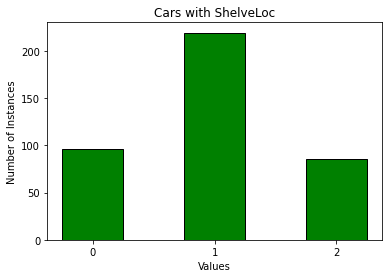

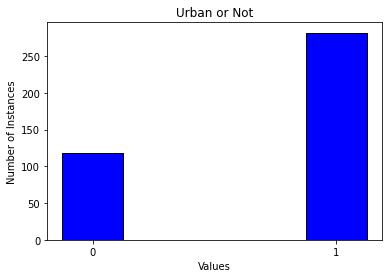

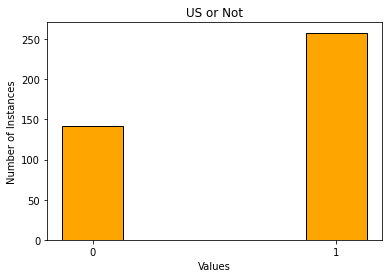

In [23]:
shelveloc = defaultdict(int)
urban = defaultdict(int)
us = defaultdict(int)

for i in range(len(df)):
    shelveloc[df.loc[i]['ShelveLoc']] += 1
    urban[df.loc[i]['Urban']] += 1
    us[df.loc[i]['US']] += 1

plt.bar(shelveloc.keys(), shelveloc.values(), color='green', width=0.5, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of Instances')
plt.xticks(list(shelveloc.keys()))
plt.title('Cars with ShelveLoc')
plt.show()

plt.bar(urban.keys(), urban.values(), color='blue', width=0.25, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of Instances')
plt.xticks(list(urban.keys()))
plt.title('Urban or Not')
plt.show()

plt.bar(us.keys(), us.values(), color='orange', width=0.25, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Number of Instances')
plt.xticks(list(us.keys()))
plt.title('US or Not')
plt.show()

In [24]:
result = df.describe()
result.to_csv('carseats-EDA.csv')
result

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,0.972500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,1.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,1.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [25]:
corr_result = df.corr()
corr_result.loc['Sales'][1:]

CompPrice      0.064079
Income         0.151951
Advertising    0.269507
Population     0.050471
Price         -0.444951
ShelveLoc      0.554458
Age           -0.231815
Education     -0.051955
Urban         -0.015419
US             0.177093
Name: Sales, dtype: float64

In [26]:
y = np.array(df['Sales'])
X = df.drop('Sales', axis=1)
X = np.array(X)
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

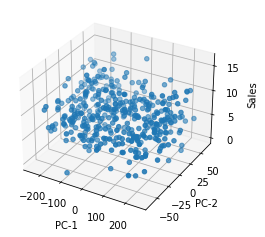

In [27]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:,0], X_pca[:,1], y)
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('Sales')
plt.show()

# Data Splitting

In [28]:
random_permutation = np.random.permutation(len(df))
train_size = math.ceil(len(df)*0.8)
test_size = math.ceil(len(df)*0.2)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(train_size):
    X_train.append(X[i])
    y_train.append(y[i])
for i in range(test_size):
    X_test.append(X[i])
    y_test.append(y[i])

print(f"Number of Training instances : {len(X_train)} and Test instances : {len(X_test)}")

Number of Training instances : 320 and Test instances : 80


# Regression Model

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)

print(f"Training R2 Score : {r2_train}\nTest R2 Score : {r2_test}")

y_pred = reg.predict(X_test)
r2_train_adj = 1 - (1-r2_train)*(len(y)-1)/(len(y)-len(list(df.columns))-1)
r2_test_adj = 1 - (1-r2_test)*(len(y)-1)/(len(y)-len(list(df.columns))-1)

print(f"Training Adjusted-R2 Score : {r2_train_adj}\nTest Adjusted-R2 Score : {r2_test_adj}")

Training R2 Score : 0.8742055103252441
Test R2 Score : 0.8934074278936275
Training Adjusted-R2 Score : 0.8706391717004442
Test Adjusted-R2 Score : 0.890385473529787


In [35]:
df_temp = df.drop('Sales', axis=1)
model = {}

for col, coeff in zip(df_temp.columns, reg.coef_):
    model[col] = coeff
model['intercept'] = reg.intercept_

print(f"Coefficients and Intercept : \n{pd.Series(model)}")

Coefficients and Intercept : 
CompPrice      0.093926
Income         0.016642
Advertising    0.131757
Population     0.000446
Price         -0.094721
ShelveLoc      2.392678
Age           -0.045192
Education     -0.025620
Urban          0.093614
US            -0.243929
intercept      5.130958
dtype: float64


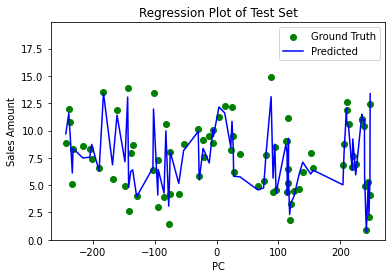

In [36]:
pca = PCA(n_components=1).fit(X_train)
X_test_pca = pca.transform(X_test)

pred_dict = {}
for xi, yi in zip(X_test_pca, y_pred):
    pred_dict[float(xi)] = yi

pred_dict = OrderedDict(sorted(pred_dict.items()))

plt.scatter(X_test_pca, y_test, color='green', label='Ground Truth')
plt.plot(list(pred_dict.keys()), list(pred_dict.values()), color='blue', label='Predicted')
#plt.plot([list(pred_dict.keys())[0], list(pred_dict.keys())[-1]], [list(pred_dict.values())[0], list(pred_dict.values())[-1]], color='red', label='Reg Line')
plt.xlabel('PC')
plt.ylabel('Sales Amount')
plt.title('Regression Plot of Test Set')
plt.legend()
plt.ylim([0, max(y_test)+5])
plt.show()

## Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

depth = [i for i in range(1, 11)]
best_model = {'depth' : 0, 'score' : 0, 'model' : None}

for i in depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    if best_model['score'] < score:
        best_model['depth'] = i
        best_model['score'] = score
        best_model['model'] = copy.deepcopy(model)

print(best_model)

{'depth': 10, 'score': 0.9931424900216899, 'model': DecisionTreeRegressor(max_depth=10)}


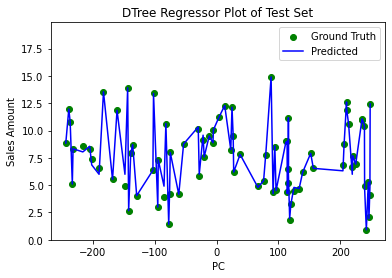

In [46]:
y_pred = best_model['model'].predict(X_test)

pca = PCA(n_components=1).fit(X_train)
X_test_pca = pca.transform(X_test)

pred_dict = {}
for xi, yi in zip(X_test_pca, y_pred):
    pred_dict[float(xi)] = yi

pred_dict = OrderedDict(sorted(pred_dict.items()))

plt.scatter(X_test_pca, y_test, color='green', label='Ground Truth')
plt.plot(list(pred_dict.keys()), list(pred_dict.values()), color='blue', label='Predicted')
#plt.plot([list(pred_dict.keys())[0], list(pred_dict.keys())[-1]], [list(pred_dict.values())[0], list(pred_dict.values())[-1]], color='red', label='Reg Line')
plt.xlabel('PC')
plt.ylabel('Sales Amount')
plt.title('DTree Regressor Plot of Test Set')
plt.legend()
plt.ylim([0, max(y_test)+5])
plt.show()